<a href="https://colab.research.google.com/github/imshubhangisingh/Fitness-Manufacturing-Company-Business-Case/blob/main/Fitness_Manufacturing_Company_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

Leveraging the customer data collected by **Fitness Equipment Manifacturer Company** consisting of the Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing recommendations of treadmill for future orders/customers based on their profile.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# Shape of the dataset
print(f"Total Rows: {df.shape[0]}\nTotal Columns: {df.shape[1]}")

Total Rows: 180
Total Columns: 9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Checking data types
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


From the above observation, we can conclude that only Income, Miles and Age can be considered as Continuous

Rest of the columns though integers/floats will fall under categories.

In [ ]:
# Checking for null values -
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

We don't have any missing values in the dataset.

### Checking value counts for categorical columns


In [ ]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

### A broader look at correlation between the columns of dataframe

In [ ]:
# Creating Data frame Copy
df_copy=df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)
df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


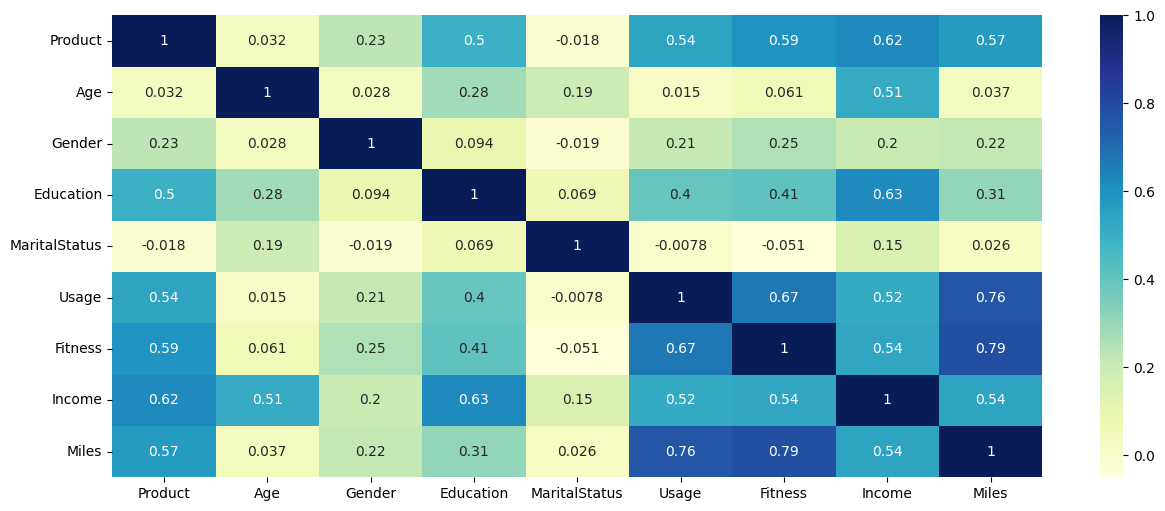

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

###Observations from above plot:

1) Product(Treadmill) - purchase highly correlates with Education, Income, Usage, Fitness and Miles

2) Age - highly correlated with Income(0.51). It is also correlated with Education and Marital Status which seems reasonable.

3) Gender - certainly has some correlation with Usage, Fitness, Income and Miles.

4) Education - is lightly correlated to Age and Miles. It's highly correlated to Income and moderately correlated to Usage and Fitness too.

5) Marital Status - has some correlation with Income and Age.

6) Usage - is extreamly high correlated to Fitness and Miles and has a higher correlation with Income as well.

7) Fitness - has a high correlation with Income.


### Checking for Outliers in Age, Income and Miles

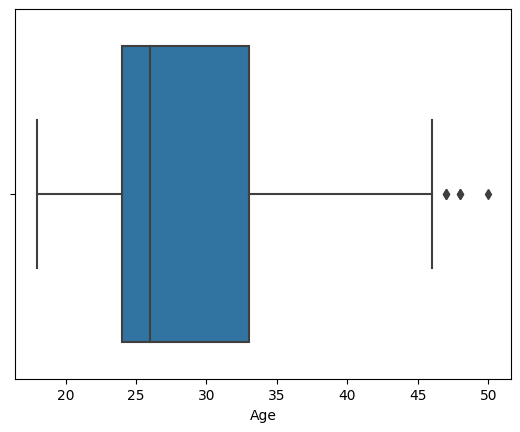

In [ ]:
ax = sns.boxplot(x=df["Age"])
plt.show()

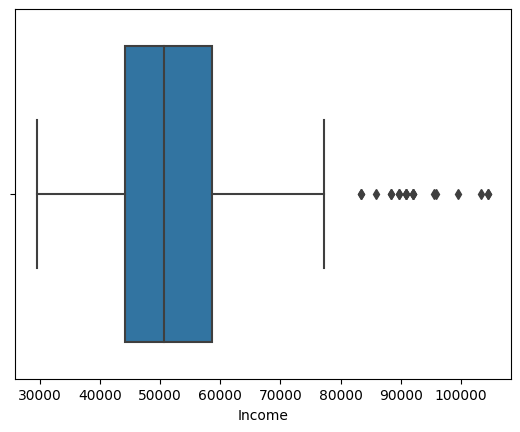

In [ ]:
ax = sns.boxplot(x=df["Income"])
plt.show()

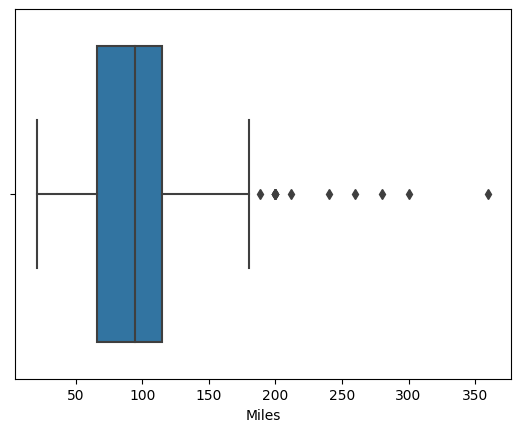

In [ ]:
ax = sns.boxplot(x=df["Miles"])
plt.show()

So as we can see our data does have outliers. So we will be treating these outliers using Clipping Method(- ranges between 5 percentile and 95 percentile) instead of removing them as it results in loss of data.

P.S. - The outlier treatment is demonstrated in the below piece of code for the copy of dataframe but it is not incorporated in the below analysis since these three numerical columns are binned and then analyzed.

In [ ]:
num_feat=['Age', 'Income', 'Miles']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

###Scatterplots for Analysis of Continuous Variables

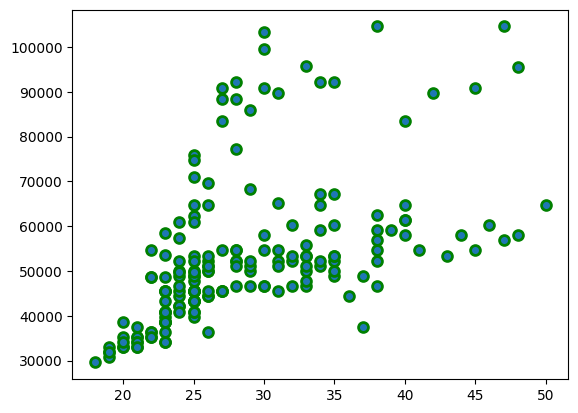

In [ ]:
# Observing the association between Age and Income
plt.scatter(df['Age'], df['Income'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as Heteroscadasticity.

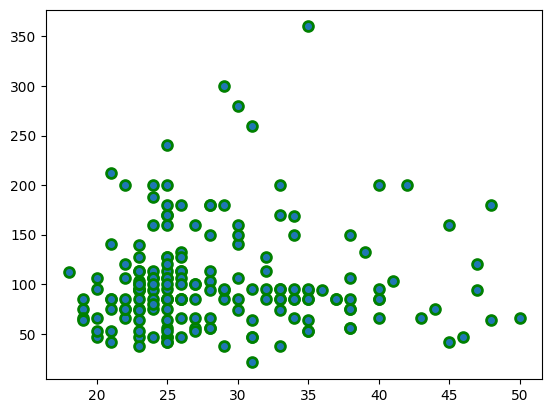

In [ ]:
# Observing the association between Age and Miles
plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.

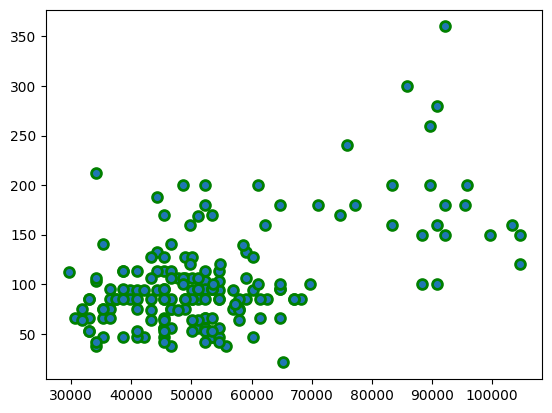

In [ ]:
# Observing the association between Miles and Income
plt.scatter(df['Income'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. Moreover there's also a Heteroscadastic effect.

###Analysis of Categorical Columns with the Product

We will be converting the Ages, Incomes and Miles to bins for better analysis.

<ipython-input-25-18616fc15308>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True, kde=True,


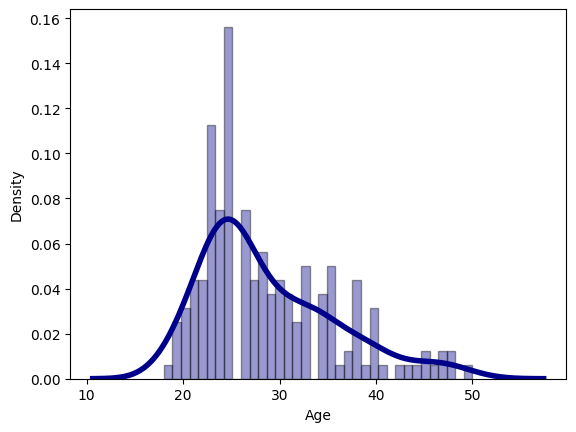

In [ ]:
# Observing the ages to create bins
sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Bins on intervals of 5 as age gaps and below 20, above 40
bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


In [ ]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

<ipython-input-28-d1f476c0f001>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


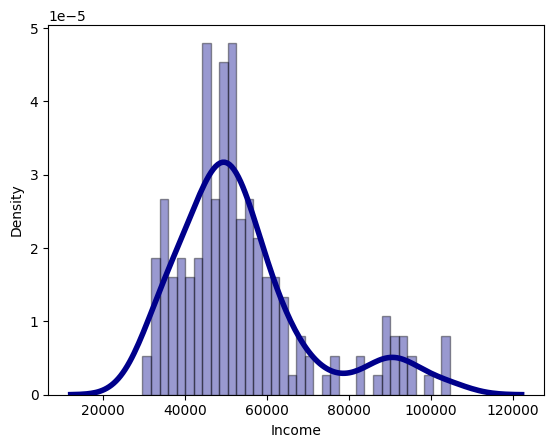

In [ ]:
# Observing the incomes to create bins
sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Bins for income
bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


In [ ]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

<ipython-input-30-27d391b58bc0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Miles'], hist=True, kde=True,


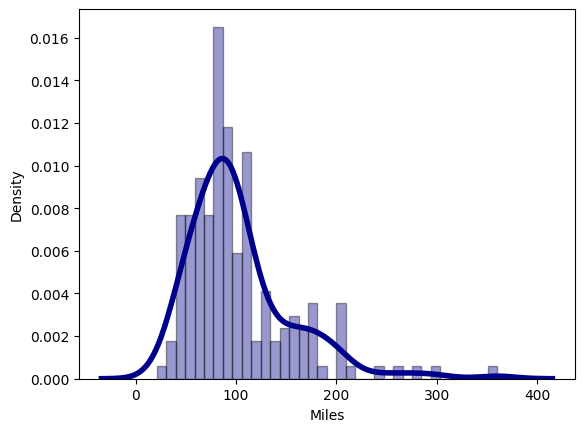

In [ ]:
# Observing the miles to create bins
sns.distplot(df['Miles'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


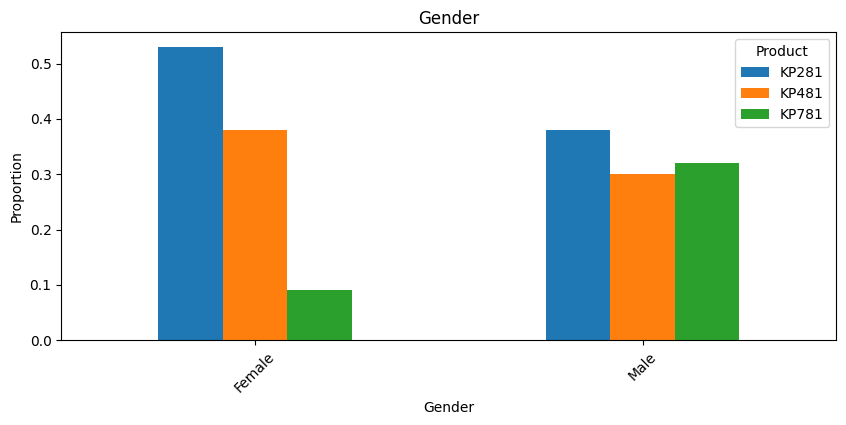

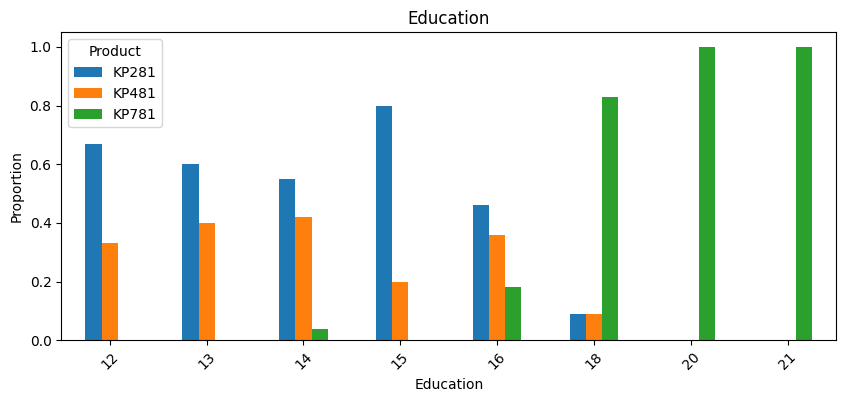

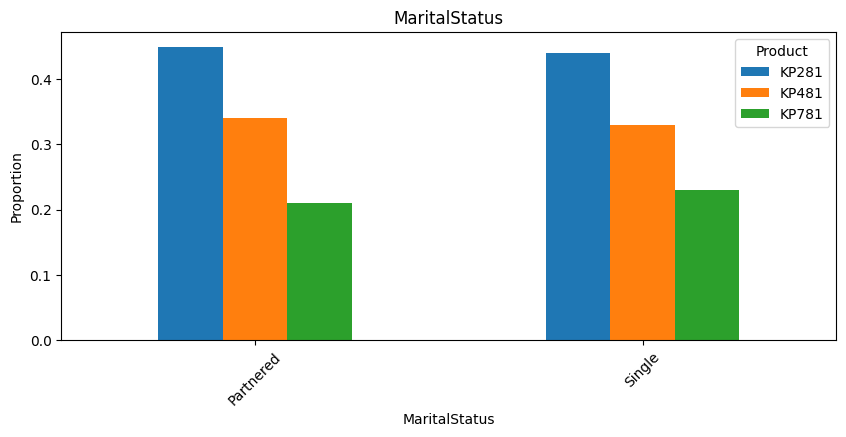

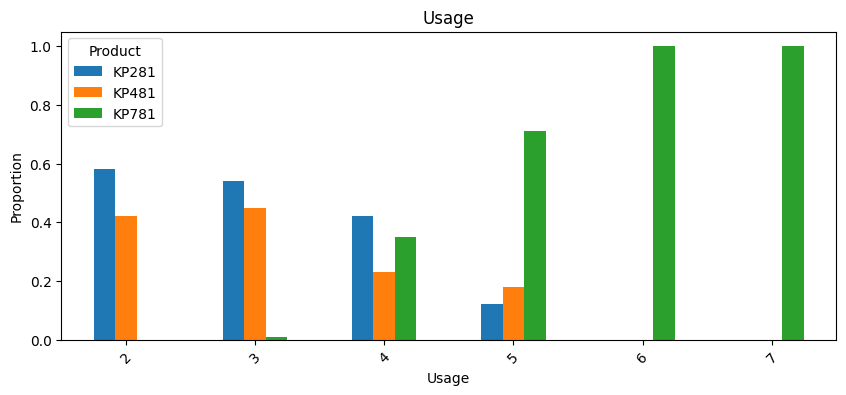

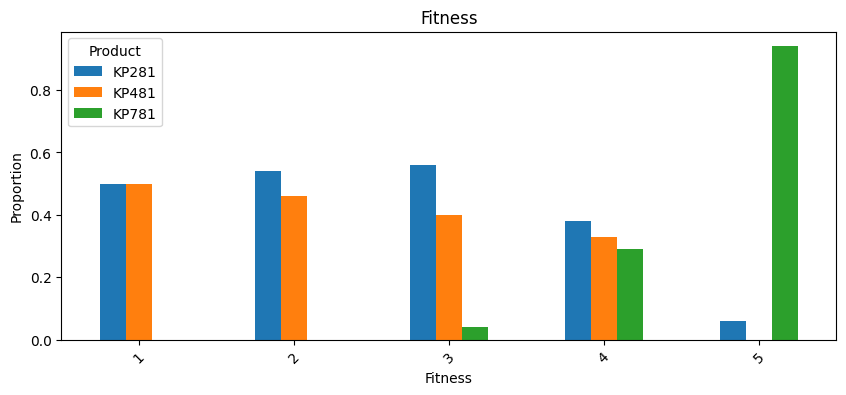

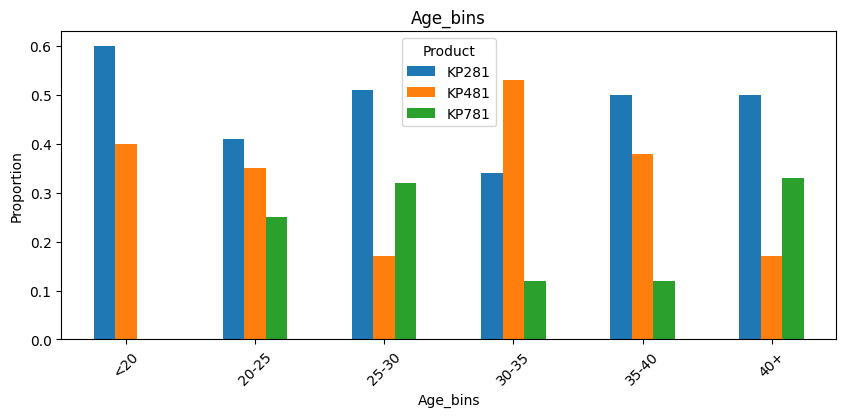

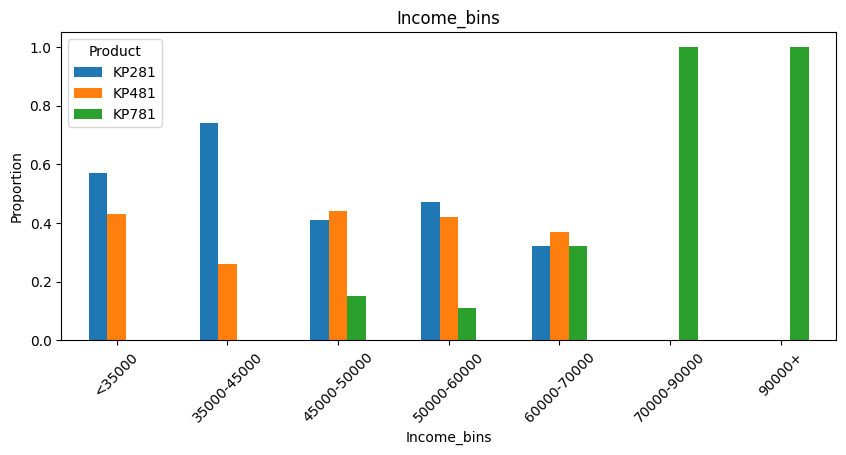

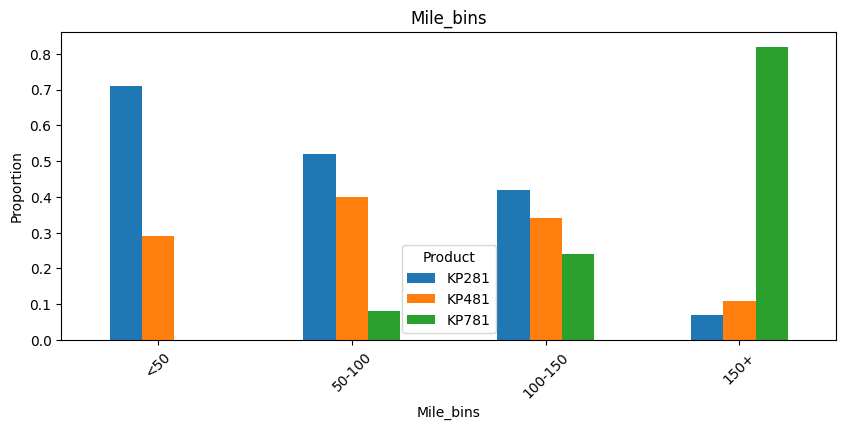

In [ ]:
# Crosstabs Analysis
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

###Observations based on above Categorical Plots:

1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

2) 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3) Marital Status implies no significant information on the usages of different treadmills.

4) Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6) No one below 20 years of age use KP781.

7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

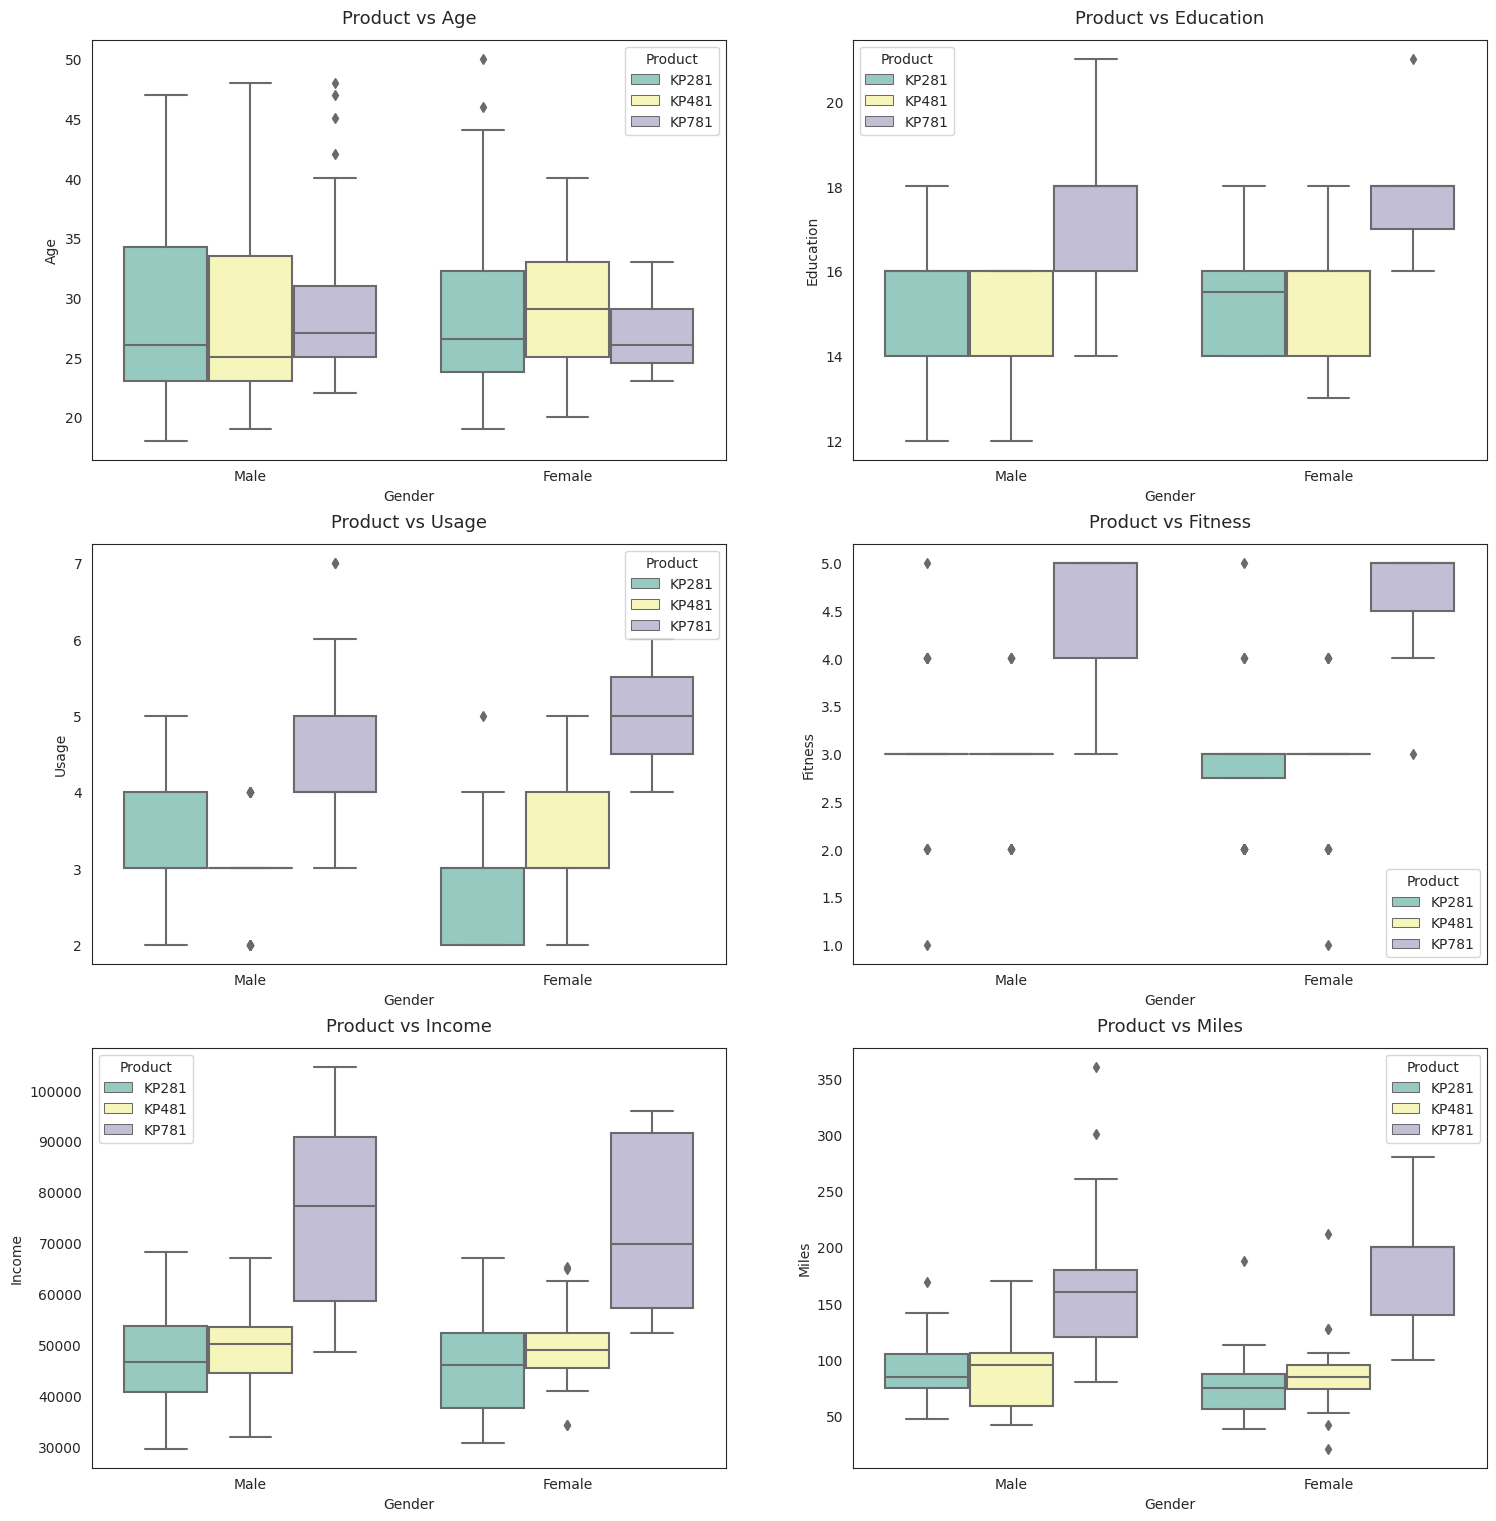

In [ ]:
c_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=c_cols[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {c_cols[count]}", pad=12, fontsize=13)
        count += 1

Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product.

### Computing Probabilities

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100           #each element divided by 180

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')
#pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='columns')
#each element divided by summation of individual rows

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


In [ ]:
#Optimised Code
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


####Normalize parameter accept boolean values. It depicts the percentage of time each combination occurs (i.e. the marginal probability).
They normalize by dividing all values by the sum of values.

- If passed ‘all’ or True, will normalize over all values.

- If passed ‘index’ will normalize over each row.

- If passed ‘columns’ will normalize over each column.

- In case if margins is True, will also normalize margin values.

####Brief depiction of Probabilities Inferred from the above tables

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6% P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12%

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and P(KP781|Mile_bins>150)=82.1%

##Customer Profiling and Recommendations:

**KP781**
<br>

  - Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.

  - Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
<br>
      a) Education Level >= 18
      b) Usage days > = 5
      c) Fitness Levels = 5
      d) The person runs more than 150 miles(80% of them use KP781)

- Never Recommend KP781 if one or more of these conditions are satisfied:-
<br>
    a) Education Levels < 14
    b) Fitness < 3
    c) Age < 20
    d)Income < 45000
    e) Miles run < 50

**Why very few women have bought the luxurious KP781 treadmill?**
<br>
Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).


**Note for below mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

**KP281:**

- Women having incomes below 70k and age > 40
<br>
- Customers having income in range 60k-70k and usage days=3
<br>
- Customers having income in range 45k-50k and usage days=2
<br>
- Customers having income in range 35k-45k and usage days=4
<br>
- Customers having income in range 50k-60k and usage days=4
<br>
- Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
- Customers with Education Level=16, Age>32 and income 45k-50k
<br>
- Customers with Education Level=16, Age>45 and income 60k-70k
<br>
- Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k
<br>
- Customers with 40+ Age and 60k-70k income
<br>
- Women with incomes < 35k and whose miles run < 105
<br>
- Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
- Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
- Customers with Education level=15 having incomes less than 35k
<br>
- Customers with Usages=3, miles run < 70 and Age>40
<br>
- Customers with Usages=2 and Age between 25-30


**KP481:**

- Women having incomes below 70k and age between 32-37
<br>
- Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
- Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
- Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
- Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
- Customers with 35-40 Age and 60k-70k income
<br>
- Women with incomes < 35k and whose miles run >105
<br>
- Men with incomes 60k-70k and who tread in range 100-150 miles
<br>
- Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
- Customers with Education level=13 having incomes in ranges 45-60k
<br>
- Customers with Usages=2 and Age>40
